# Natural Language Processing 

## Using NLP to determine if an email is spam or not

In [1]:
#importing the lib and getting the dataset

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/ham-spam.csv")

In [2]:
#Shuffling the rows to distribute positive and negative samples

df = df.sample(frac=1,random_state=0)
df.head()

,IsSpam,Text
993,1,utf date course utf diminish weight our table...
859,1,utf any drugs eur utf for dose have you ever ...
298,0,expert finderhttps expertfinder enron com
553,1,and courtiers ministerssubsegment founded res...
672,1,for our clients fargo dear customer have updat...


In [3]:
#Removing any dup rows and checking the balance 

df = df.drop_duplicates()
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499         expert finderhttps expertfinder enron com     1
1        500    500   utf date course utf diminish weight our table...    1

In [4]:
#Extract the dataframe's Text col and label

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

x = df['Text']
y = df['IsSpam']

max_words = 10000 # Limit the vocabulary to the 10,000 most common words
max_length = 500
 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen=max_length)

In [5]:
#Defining a binary classification model that contains an embedding layer with 32 dim, a flatten layer , 
#a dense layer for classification and an output layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
 
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 128)               2048128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,368,257
Trainable params: 2,368,257
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train the network and allow keras to use 20% of the training samples for validation

hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=20)

Epoch 1/5
40/40 [==============================] - 3s 39ms/step - loss: 0.6444 - accuracy: 0.6370 - val_loss: 0.5023 - val_accuracy: 0.7450
Epoch 2/5
40/40 [==============================] - 2s 52ms/step - loss: 0.2693 - accuracy: 0.9287 - val_loss: 0.2788 - val_accuracy: 0.8750
Epoch 3/5
40/40 [==============================] - 2s 46ms/step - loss: 0.0614 - accuracy: 0.9837 - val_loss: 0.1235 - val_accuracy: 0.9700
Epoch 4/5
40/40 [==============================] - 1s 34ms/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.1202 - val_accuracy: 0.9700
Epoch 5/5
40/40 [==============================] - 1s 33ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.1193 - val_accuracy: 0.9600


[]

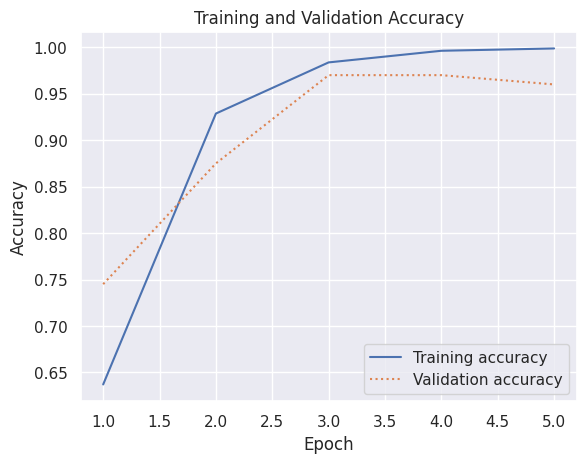

In [7]:
#Plotting the training and validation acc in each epoch

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [8]:
#Testing the model with the following email/text

text = 'Can you attend a code review on Tuesday? ' \
       'Need to make sure the logic is rock solid.'

sequence = tokenizer.texts_to_sequences([text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

1/1 [==============================] - 0s 422ms/step


0.5774049

In [9]:
#another test
text = 'Why pay more for expensive meds when ' \
       'you can order them online and save $$$?'

sequence = tokenizer.texts_to_sequences([text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)[0][0]

1/1 [==============================] - 0s 31ms/step


0.99744266